#Classifier testing based on generated data
Objective: 
- DONE generate test data in 2d based on X categories
- DONE do Naive Bayes classifier
- do KNN using variety of K
- do SVM or alternative


##Data generation

In [55]:
#import section
from sklearn import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

###Breakout session numpy arrays selective filtering and visualization (method from Raschke)

In [103]:
xm = np.random.randint(0,10,3*10)
xm = xm.reshape(10,3)
y = np.random.randint(0,3,10)
#y = y.reshape(10,1)

In [104]:
visualize = np.hstack((xm[:,:2], y.reshape(10,1)))
visualize

array([[5, 2, 1],
       [2, 7, 0],
       [3, 4, 1],
       [4, 2, 0],
       [2, 3, 1],
       [8, 0, 0],
       [7, 8, 0],
       [5, 9, 2],
       [7, 3, 1],
       [0, 1, 1]])

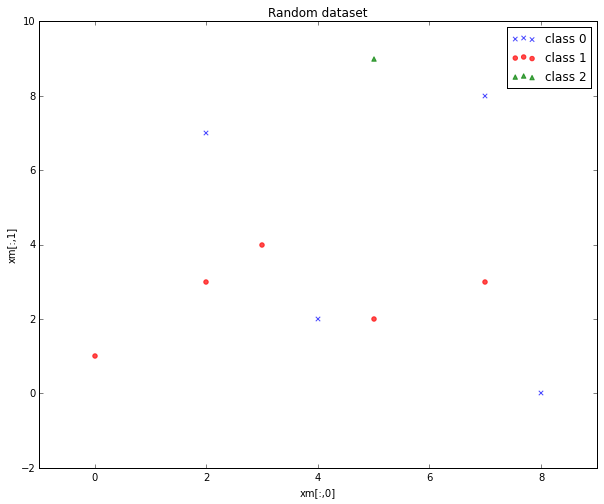

In [105]:
plt.figure(figsize=(10,8))
    
for label,marker,color in zip(
    range(0,3),('x', 'o', '^'),('blue', 'red', 'green')):
    

    plt.scatter(x=xm[:,0][y == label], # x-axis: feat. from col. 1
                y=xm[:,1][y == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}'.format(label) # label for the legend
                )
    
plt.title('Random dataset')
plt.xlabel('xm[:,0]')
plt.ylabel('xm[:,1]')
plt.legend(loc='upper right')
    
plt.show() 

In [108]:
#numpy'ify test
testl = []
for i in range(1,5):
    for j in range(1,4):
        testl.append((i,j,2))
testa = np.asarray(testl)
print testl, len(testl), testa, np.shape(testa)

[(1, 1, 2), (1, 2, 2), (1, 3, 2), (2, 1, 2), (2, 2, 2), (2, 3, 2), (3, 1, 2), (3, 2, 2), (3, 3, 2), (4, 1, 2), (4, 2, 2), (4, 3, 2)] 12 [[1 1 2]
 [1 2 2]
 [1 3 2]
 [2 1 2]
 [2 2 2]
 [2 3 2]
 [3 1 2]
 [3 2 2]
 [3 3 2]
 [4 1 2]
 [4 2 2]
 [4 3 2]] (12, 3)


[[-0.08186294  1.11014733]
 [ 0.50197144 -1.0108564 ]
 [ 1.4790906  -0.24800662]
 [ 0.36558718  0.23782896]
 [-0.46037288  3.12550971]
 [ 1.16943342 -0.42792532]
 [-0.594085   -1.41270672]
 [-2.14743101  0.55530367]
 [ 0.25687494 -0.17355034]
 [ 0.76443767  1.45512227]]


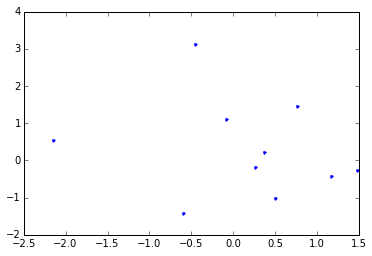

In [155]:
#samples = np.random.multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 1000)
#plt.plot(samples[:, 0], samples[:, 1], '.')

samples = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], 10)
print samples
plt.plot(samples[:, 0], samples[:, 1], '.')

##Consolidate findings

In [351]:
def PlotDataPoints(data):
    '''
    plots the 2d data for each dataset in data
    data to be 2d list of [x1,x2,class] for each class
    
    EXPANSION IDEAS
    - add possibility for 3d data

    '''
    
    plt.figure(figsize=(10,8))
    
    #create zip lists
    num_classes = int(np.max(data[:,-1])) +1
    if num_classes > 8:
        num_classes = 8
        print 'Max class limit reached: plotting first 8 classes'
    colorlist = ('blue', 'red', 'green', 'black', 'cyan', 'magenta', 'yellow', 'brown')
    markerlist = ('x', 'o', '^', '8', 's', 'p', 'D', 'v')
    
    for label,marker,color in zip(
        range(0,num_classes),markerlist,colorlist):
    

        plt.scatter(x=data[:,0][data[:,-1] == label], # x-axis: feat. from col. 1
                    y=data[:,1][data[:,-1] == label], # y-axis: feat. from col. 2
                    marker=marker, # data point symbol for the scatter plot
                    color=color,
                    alpha=0.7,
                    label='class {:}'.format(label) # label for the legend
                    )
    
    plt.title('Multivar datasets')
    plt.xlabel('X[:,0]')
    plt.ylabel('X[:,1]')
    plt.legend(loc='upper right')
    
    plt.show() 
    return

In [313]:
def LoadXy(data, normalize=False):
    '''
    splits data into feature matrix X and class vector y
    returns X, y (numpy arrays)
    '''
    X = data[:,:-1]
    y = data[:,-1]
    y = y.reshape((np.shape(X)[0],1))
    if normalize:
        #Normalize features
        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)
    return X,y

In [346]:
def GenerateMultiVarDataPoints(sets=3,setpoints=50,sd_scaling=1.0,shuffle=False):
    '''
    GenerateDataPoints: creates sets of normally distributed data in 2D
    parameters: sets=number of sets to create
    setpoints = number of points per set to be generated
    overlap = BOOLEAN, if False(default) the data sets are unlikely to overlap
    returns numpy array [(sets x setpoints) X (x1,x2,class)]
    
    EXPANSION OPTIONS
    - option to make y dimensions
    - provide option to share x dimensions of y
    - provide option to randomly share x dimensions
    '''
    
    cov = [[1, 0],[0, 1]]   #Co-variance of multivariate gaussian
    x_offset = 3.0          #Offset for x axis
    temp = []     #temporary list to contain generated datapoints and set id
    #normal random variable will lie outside the interval μ ± 1.96σ in only 5% of cases
        
    #Create set mean location
    setmean = []
    angle_rad = 2 * np.pi / sets
    for i in range(0,sets):
        setmean.append((x_offset + sd_scaling * np.sin(i* angle_rad), sd_scaling * np.cos(i* angle_rad), i))
    
    #Create set datapoints
    for i in range(0,sets):
        points = np.random.multivariate_normal([setmean[i][0], setmean[i][1]], cov, setpoints)
        classvec = np.ones((setpoints,1)) * i
        #now hstack
        points = np.hstack((points,classvec))
        temp.append(points)
    data = np.asarray(temp)
    data = data.reshape(sets*setpoints,3)
    if shuffle:
        data = np.random.permutation(data)

    return data

In [385]:
test = GenerateMultiVarDataPoints(3,1000,2.0,True)

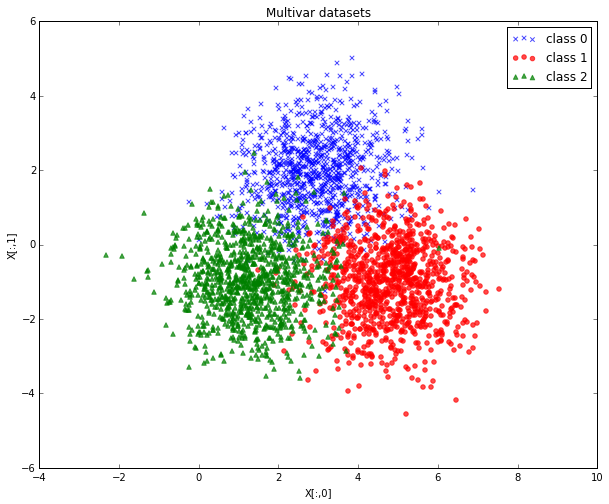

In [386]:
PlotDataPoints(test)

In [387]:
X,y = LoadXy(test,True)

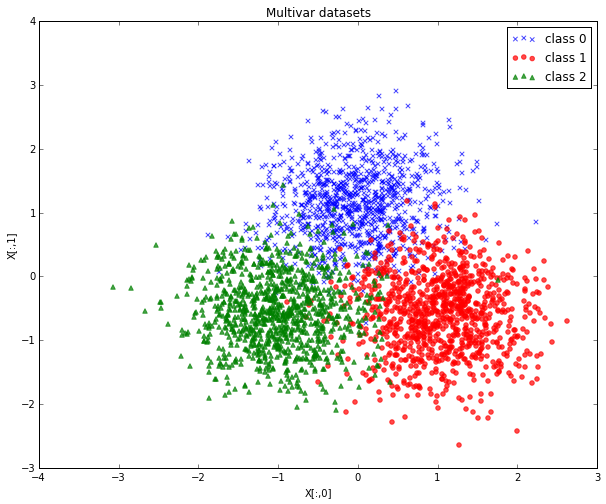

In [388]:
PlotDataPoints(np.hstack((X,y)))

##Classifier testing

###Naive Bayes

In [389]:
# Example of Naive Bayes implemented from Scratch in Python
import csv
import random
import math

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.iteritems():
        summaries[classValue] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.iteritems():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities
            
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.iteritems():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i]) #sends the seperate by class features mean/var (2 class x 8 feat)
        #as well as the feature input vector that INCLUDES THE CLASS
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    splitRatio = 0.67
    trainingSet, testSet = splitDataset(np.hstack((X,y)), splitRatio)
    #print testSet[0:9]     #shows 8 features and 1 class per example
    print('Split {0} rows into train={1} and test={2} rows').format(np.shape(X)[0], np.shape(trainingSet)[0], np.shape(testSet)[0])
    # prepare model
    summaries = summarizeByClass(trainingSet)
    #shows 2 classes, with 8 feature summaries (mean, var)
    #print summaries
    # test model
    predictions = getPredictions(summaries, testSet)
    #print testSet[1]
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%').format(accuracy)

main()

Split 3000 rows into train=2010 and test=990 rows
Accuracy: 91.6161616162%
